In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
ds_attacks = pd.read_csv('../input/attacks/attacks.csv')

In [2]:
ds_attacks

,Case Number,Date,Year,Type,Country,Activity,Name,Sex,Age,Fatal (Y/N);
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,Paddling,Julie Wolfe,F,57,N;
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Standing,Adyson McNeely,F,11,N;
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Surfing,John Denges,M,48,N;
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,Surfing,male,M,NaN,N;
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Free diving,Gustavo Ramos,M,NaN,N;
...,...,...,...,...,...,...,...,...,...,...
5758,2015.10.07,07-Oct-2015,2015.0,Unprovoked,AUSTRALIA,Surfing,Eli Zawadzki,M,18,N;
5759,2015.10.05.b,05-Oct-2015,2015.0,Unprovoked,USA,Body boarding,male,M,22,N;
5760,2015.10.05.a,05-Oct-2015,2015.0,Unprovoked,USA,Wading,Gregory Slaughter,M,13,N;
5761,2015.10.04,04-Oct-2015,2015.0,Unprovoked,USA,Surfing,Phillip Tarasovic,M,14,N;


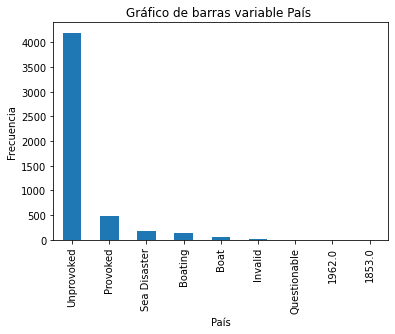

In [3]:
casos=ds_attacks.Type.value_counts()

grf_a1=casos.plot.bar(alpha=1 , title="Gráfico de barras variable País " , xlabel="País" , ylabel="Frecuencia") #El dataset tiene basura

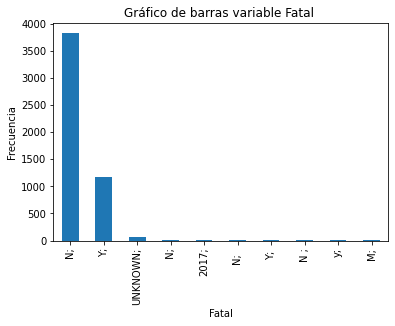

In [4]:
casos_actividades=ds_attacks['Fatal (Y/N);'].value_counts()

grf_a2=casos_actividades.plot.bar(alpha=1 , title="Gráfico de barras variable Fatal " , xlabel="Fatal" , ylabel="Frecuencia") #El dataset tiene basura

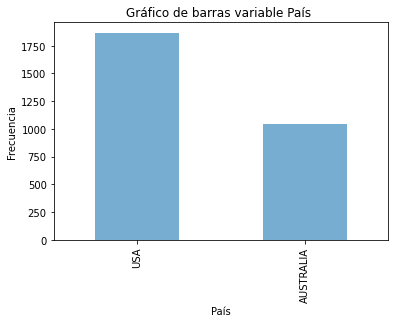

In [5]:
grf_a4= ds_attacks.Country.value_counts()[:2].plot.bar(alpha=0.6 , title="Gráfico de barras variable País " , xlabel="País" , ylabel="Frecuencia") 

c) Crear un nuevo dataframe **shark_attacks** que contenga unicamente los ataques correspondientes a los dos países del punto b

In [6]:
casos_p=ds_attacks.Country.value_counts()[:2]
ds_casos_p=pd.DataFrame(data=zip(casos_p.index,casos_p.values), columns=['country','cases'])
ds_casos_p

,country,cases
0,USA,1868
1,AUSTRALIA,1046


#### d) Registros con valores inconsistentes:
* La varible "Sex" debe contener únicamente los valores F, M . Eliminar los que no correspondan y también los valores faltantes.
* La variable "Age" debe contener únicamente valores numéricos.Eliminar los valores que no correspondan, reemplazar los valores faltantes por 0 y convertir el tipo de dato a entero.
* La variable Year debe contener únicamente valores del tipo AAAA (Ej: 1890,1916,etc). Modificar los valores y convertir el tipo de dato a entero. *Hint : str.replace(...)* . Filtrar los registros desde el 1800 en adelante.

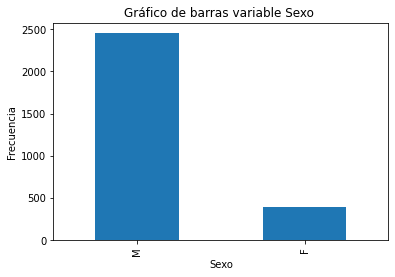

In [7]:
ds_attacks.dropna(inplace=True)
ds_attacksf=ds_attacks.drop(ds_attacks.query('Sex != "F" & Sex != "M"').index)
sex_f=ds_attacksf['Sex'].value_counts()

grf_a2=sex_f.plot.bar(alpha=1 , title="Gráfico de barras variable Sexo " , xlabel="Sexo" , ylabel="Frecuencia") #El dataset tiene basura

In [8]:
ds_attacksf['Age'] = pd.to_numeric(ds_attacksf['Age'], errors='coerce') .fillna (0) 
ds_attacksf['Age'] = ds_attacksf['Age'].astype(int)
ds_attacksf['Age'].value_counts()

17    127
15    126
18    122
19    121
16    119
     ... 
72      1
84      1
86      1
82      1
74      1
Name: Age, Length: 79, dtype: int64

In [9]:

ds_attacksf['Year'] = pd.to_numeric(ds_attacksf['Year'], errors='coerce') .fillna (1800) 
ds_attacksf['Year'] = ds_attacksf['Year'].astype(int)
ds_attacksf['Year']

0       2018
1       2018
2       2018
6       2018
7       2018
        ... 
5758    2015
5759    2015
5760    2015
5761    2015
5762    2015
Name: Year, Length: 2850, dtype: int64

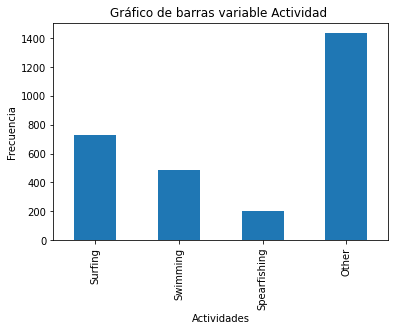

In [10]:
actividades_principales = ds_attacksf['Activity'].value_counts()[:3]
actividades_principales['Other'] = ds_attacksf['Activity'].value_counts()[3:].sum()
grf_a = actividades_principales.plot.bar(alpha=1 , title="Gráfico de barras variable Actividad " , xlabel="Actividades" , ylabel="Frecuencia") 

                                                            

#### f) Realizar una tabla cruzada para las siguientes combinaciones de variables:

* Country-Sex
* Country-Type
* Year-Sex para los últimos 10 años.

In [11]:
cross_cs = pd.crosstab(ds_attacksf['Country'],ds_attacks['Sex'])
cross_ct = pd.crosstab(ds_attacksf['Country'],ds_attacks['Type'])

ds_attacks10 = ds_attacksf.query('Year > 2009')
cross_ys = pd.crosstab(ds_attacks10['Year'],ds_attacks10['Sex'])
cross_ys

Sex,F,M
Year,,
2010,17,53
2011,7,78
2012,15,68
2013,13,71
2014,18,59
2015,21,82
2016,17,73
2017,23,51
2018,5,32


#### g) Realizar los siguientes gráficos:

* Grafico de Violin: colocar en el eje horizontal la variable **Sex** y en el eje vertical la variable **Age** seleccionado sólo los registros donde la edad sea mayor a 0.

* Gráfico de densidad para la variable **Age** por sexo, seleccionado sólo los registros donde la edad sea mayor a 0.

* Gráfico de barras con la cantidad de accidentes por año por país para los últimos 60 años.

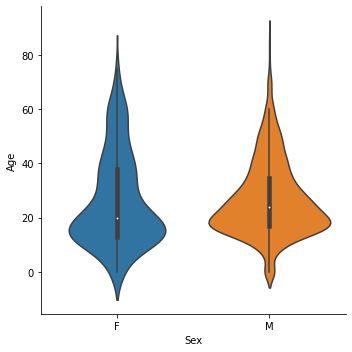

In [12]:
sns.catplot(x = "Sex", y = "Age", data = ds_attacksf, kind = "violin");

[Text(0.5, 1.0, 'Densidad variable Age'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Densidad')]

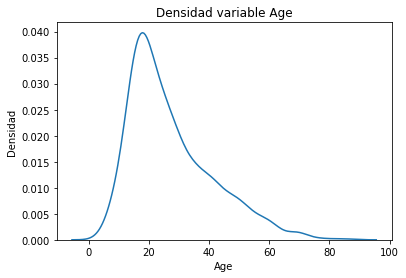

In [13]:
# Gráficos de densidad con Seaborn
sns.kdeplot(data=ds_attacksf['Age'].pipe(lambda x: x[x>0])).set(title="Densidad variable Age",xlabel="Age",ylabel="Densidad") #pipe para filtrar

[Text(0.5, 1.0, 'Frecuencia de ataques en los últimos 60 años'),
 Text(0, 0.5, 'Ataques'),
 Text(0.5, 0, 'Año')]

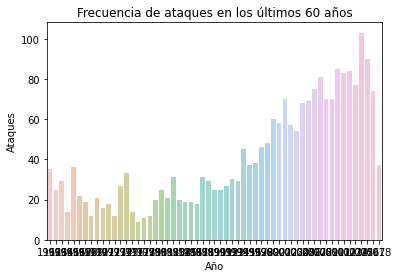

In [14]:
ds_attacks_year = ds_attacksf.query('Year >= 1962') 
ds_attacks_year=ds_attacks_year.groupby(['Year']).count()

eje_x = ds_attacks_year.index.tolist()  
eje_y = ds_attacks_year['Case Number'].tolist() 
                             
sns.barplot(x=eje_x, y=eje_y, data=ds_attacks_year ,alpha=0.5).set(title="Frecuencia de ataques en los últimos 60 años",ylabel='Ataques',xlabel='Año')
#se ve feo porque son muchos años